In [4]:
import numpy as np
from scipy import stats 
import pandas as pd
from pandas import Series, DataFrame 

import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

import sys
from pathlib import Path
import tarfile
import itertools
import urllib.request
import re

import dill

import requests
from bs4 import BeautifulSoup

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,MinMaxScaler,StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.compose import TransformedTargetRegressor,ColumnTransformer,make_column_transformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.utils.estimator_checks import check_estimator
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [5]:
def download_dataset():
    path = Path( '/mnt/All/Downloads/Datasets/housing.tgz')
    if not path.is_file():
        print('hello')
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, path)
        with tarfile.open(path) as tar:
            tar.extractall(path='/mnt/All/Downloads/Datasets')
    return pd.read_csv('/mnt/All/Downloads/Datasets/housing/housing.csv')
df=download_dataset()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='income_cat'>

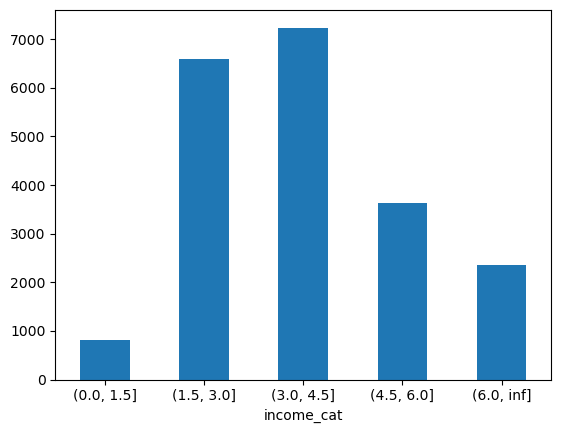

In [10]:
df['income_cat']=pd.cut(df['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf])
df['income_cat'].value_counts().sort_index().plot.bar(rot=0)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

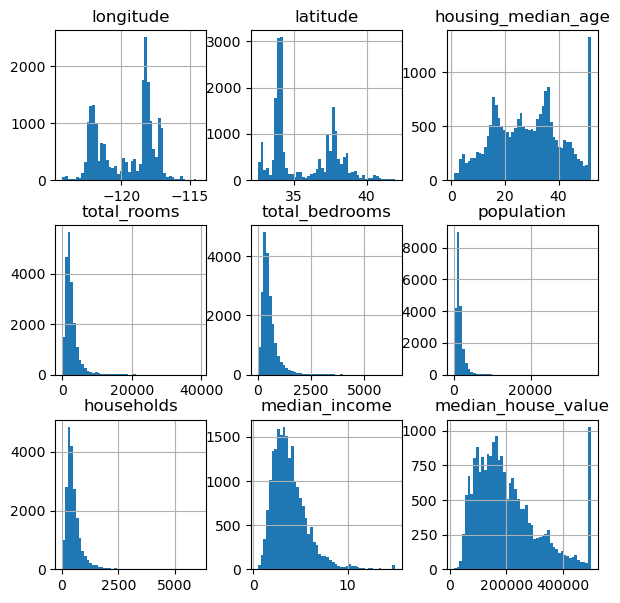

In [11]:
plt.rc('figure',figsize=[7,7])
df.hist(bins=50)

In [12]:
split=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat=[]
for train,test in split.split(df,df['income_cat']):
    tr=df.iloc[train]
    te=df.iloc[test]
    strat.append([tr,te])
str_tr,str_test=strat[0]
str_test['income_cat'].value_counts()


income_cat
(3.0, 4.5]    1447
(1.5, 3.0]    1316
(4.5, 6.0]     728
(6.0, inf]     472
(0.0, 1.5]     165
Name: count, dtype: int64

In [13]:
print(len(str_test))
tr1,te1=train_test_split(df,test_size=0.2,random_state=42)
tr1,testr=train_test_split(df,test_size=0.2,stratify=df['income_cat'])

dfc=pd.concat([df['income_cat'].value_counts()/len(df),testr['income_cat']
           .value_counts()/len(str_test),te1['income_cat'].value_counts()/len(str_test)],
          axis=1,names=['full','random','strat']).set_axis(['full','stratified','random'],axis=1).sort_index()*100
dfc['stat_er']=np.abs((dfc['full']-dfc['stratified']))/dfc['full']*100
dfc['rand_er']=np.abs((dfc['full']-dfc['random']))/dfc['full']*100
dfc.round(2)

4128


,full,stratified,random,stat_er,rand_er
income_cat,,,,,
"(0.0, 1.5]",3.98,4.00,4.24,0.36,6.45
"(1.5, 3.0]",31.88,31.88,30.74,0.02,3.59
"(3.0, 4.5]",35.06,35.05,34.52,0.01,1.53
"(4.5, 6.0]",17.63,17.64,18.41,0.03,4.42
"(6.0, inf]",11.44,11.43,12.09,0.08,5.63


In [14]:
str_train,str_test=train_test_split(df,test_size=0.2,stratify=df['income_cat'],random_state=42)
for x in (str_train,str_test):
    x.drop('income_cat',axis=1,inplace=True)
str_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

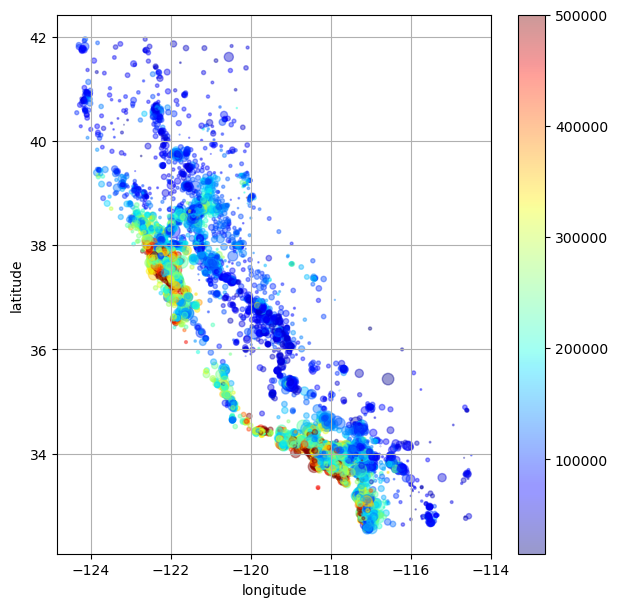

In [15]:
hous=str_train.copy()
hous.plot.scatter(x='longitude',y='latitude',grid=True,alpha=0.4,s=hous['population']/100,c=hous['median_house_value'],cmap='jet',colorbar=True,legend=True)

In [16]:
hous.corr(numeric_only=True)['population'].sort_values()

housing_median_age   -0.301906
latitude             -0.115677
median_house_value   -0.020153
median_income         0.004282
longitude             0.104236
total_rooms           0.863967
total_bedrooms        0.886200
households            0.916237
population            1.000000
Name: population, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

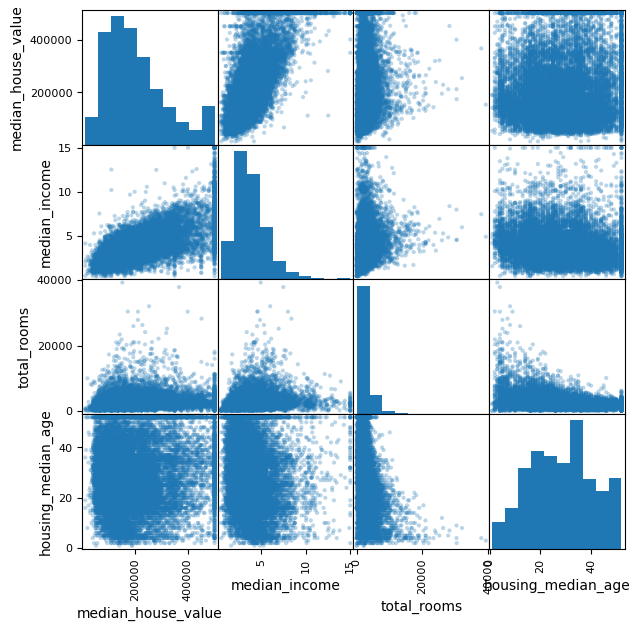

In [17]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
pd.plotting.scatter_matrix(hous[attributes],alpha=0.3)

<Axes: xlabel='median_income', ylabel='median_house_value'>

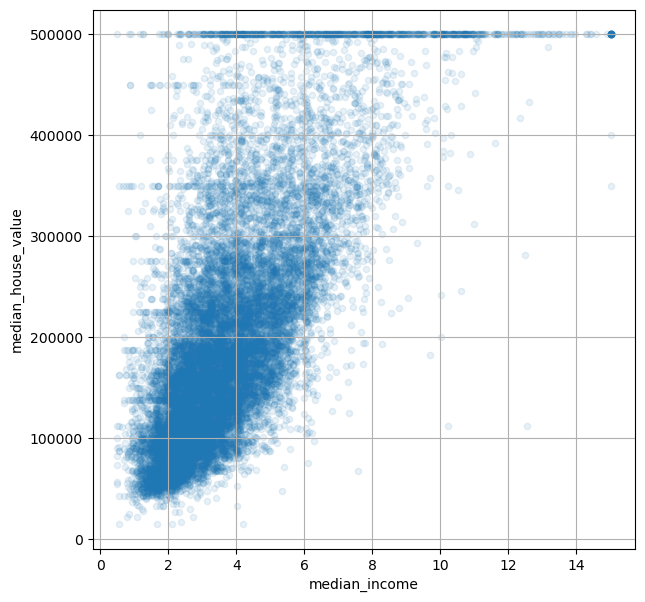

In [18]:
hous.plot.scatter(x='median_income',y='median_house_value',alpha=0.1,grid=True)

In [19]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [20]:
hous['roums_per_house']=hous['total_rooms']/hous['households']
hous['perc_of_bedrooms']=hous['total_bedrooms']/hous['total_rooms']
hous['hum_on_house']=hous['population']/hous['households']

In [21]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  roums_per_house     16512 non-null  float64
 11  perc_of_bedrooms    16344 non-null  float64
 12  hum_on_house        16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [22]:
hous.corr(numeric_only=True)['median_house_value'].sort_values()

perc_of_bedrooms     -0.256397
latitude             -0.139584
longitude            -0.050859
hum_on_house         -0.038224
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
roums_per_house       0.143663
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [23]:
house=str_train.copy()
housex=house.drop('median_house_value',axis=1)
housey=house['median_house_value']
housex['total_bedrooms'].fillna(housex['total_bedrooms'].median(),inplace=True)
housex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [24]:
imputer=SimpleImputer(strategy='median')
num=housex.select_dtypes(include=[np.number])
num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [25]:
imputer.fit(num)
print(imputer.statistics_)
print(num.median().values)
num=DataFrame(imputer.transform(num),columns=num.columns,index=num.index)
num

[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [26]:
outl=IsolationForest(random_state=42)
outliers=outl.fit_predict(num)
num[outliers==1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
1286,-121.31,37.96,52.0,1829.0,301.0,694.0,319.0,3.3466
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [27]:
hous['ocean_proximity'].value_counts().sort_values()

ocean_proximity
ISLAND           2
NEAR BAY      1846
NEAR OCEAN    2089
INLAND        5301
<1H OCEAN     7274
Name: count, dtype: int64

In [28]:
cat=hous[['ocean_proximity']]
encod=OrdinalEncoder()
cat_enc=encod.fit_transform(cat.values.reshape(-1,1))
encod.categories_
onehot=OneHotEncoder()
cat_enc=onehot.fit_transform(cat)
cat_enc

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:
minmax=MinMaxScaler((-1,1))
minmax.fit_transform(num)

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [30]:
standrt=StandardScaler()
standrt.fit_transform(num)

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

<Axes: >

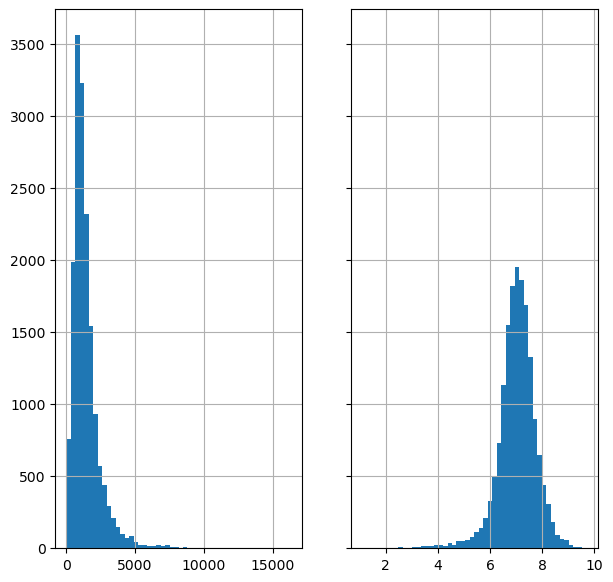

In [31]:
fig,ax=plt.subplots(1,2,sharey=True)
hous['population'].hist(ax=ax[0],bins=50)
hous['population'].apply(np.log).hist(ax=ax[1],bins=50)

<Axes: >

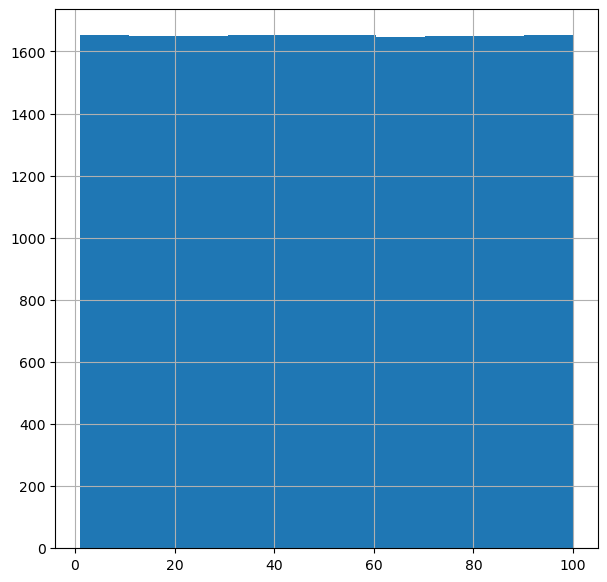

In [32]:
percents=[np.percentile(hous['median_income'],x) for x in range(1,100)]
pd.cut(hous['median_income'],bins=[-np.inf]+percents+[np.inf],labels=range(1,101)).hist()

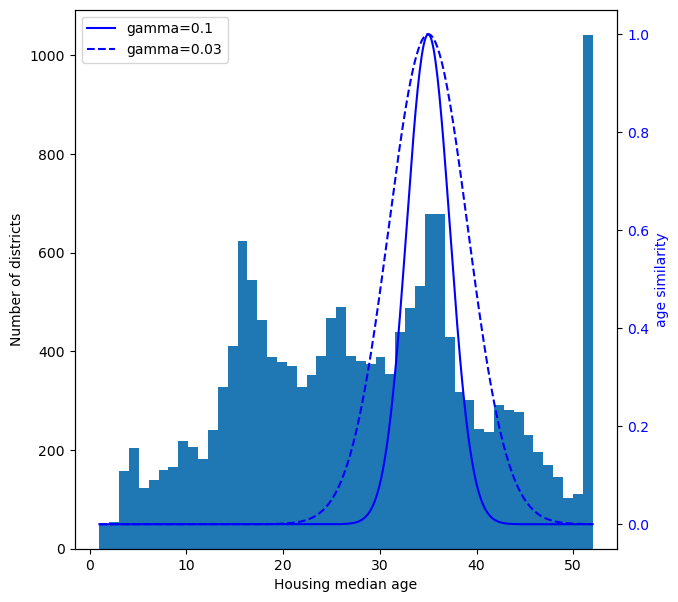

In [33]:
ages=np.linspace(hous['housing_median_age'].min(),hous['housing_median_age'].max(),500).reshape(-1,1)

gamma1=0.1
gamma2=0.03
rbf1=rbf_kernel(ages,[[35]],gamma1)
rbf2=rbf_kernel(ages,[[35]],gamma2)
fig,ax1=plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")

ax1.hist(hous['housing_median_age'],bins=50)

ax2=ax1.twinx()
ax2.plot(ages,rbf1,'-b',label='gamma=0.1')
ax2.plot(ages,rbf2,'--b',label='gamma=0.03')
ax2.set_ylabel('age similarity',color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper left')

In [34]:
regres=LinearRegression()

stan=StandardScaler()
y=stan.fit_transform(housey.to_frame())

regres.fit(housex[['median_income']],y)
prediction=regres.predict(housex[['median_income']].iloc[:5])
display(stan.inverse_transform(prediction))
display(prediction)

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [35]:
model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housex[['median_income']],housey)
model.predict(housex[['median_income']])
model

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [36]:
log_transfrom=FunctionTransformer(np.log,inverse_func=np.exp)
rbf_transform=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35]],gamma=0.1))
log_transfrom.transform(hous[['population']])
rbf_transform.transform(hous[['housing_median_age']])

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [37]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean
        
    def fit(self,X,y=None):
        X=check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1]
        return self
        
    def transform(self,X):
        check_is_fitted(self)
        X=check_array(X)
        assert self.n_features_in_==X.shape[1]
        if self.with_mean:
            X=X-self.mean_
        return X/self.scale_
        
# class StandardScalerClone(BaseEstimator, TransformerMixin):
#     def __init__(self, with_mean=True):  # no *args or **kwargs!
#         self.with_mean = with_mean

#     def fit(self, X, y=None):  # y is required even though we don't use it
#         X = check_array(X)  # checks that X is an array with finite float values
#         self.mean_ = X.mean(axis=0)
#         self.scale_ = X.std(axis=0)
#         self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
#         return self  # always return self!

#     def transform(self, X):
#         check_is_fitted(self)  # looks for learned attributes (with trailing _)
#         X = check_array(X)
#         assert self.n_features_in_ == X.shape[1]
#         if self.with_mean:
#             X = X - self.mean_
#         return X / self.scale_

In [38]:
standcl=StandardScalerClone()
arr=np.array([[1,5,6],[1.01,5,7]])
standcl.fit(arr)
standcl.transform(arr)

/tmp/ipykernel_9982/2720700305.py:18: RuntimeWarning: invalid value encountered in divide
  return X/self.scale_


array([[-1., nan, -1.],
       [ 1., nan,  1.]])

In [39]:
class ClusterSim(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state,n_init=10)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    def get_feature_names_out(self,names=None):
        return [f"Cluster {x} similarity" for x in range(self.n_clusters)]
clus=ClusterSim(n_clusters=10,gamma=1,random_state=42)
sim=clus.fit_transform(housex[['latitude','longitude']],housey)
sim[:3].round(2)


array([[0.  , 0.13, 0.  , 0.  , 0.  , 0.08, 0.  , 0.97, 0.  , 0.58],
       [0.33, 0.  , 0.95, 0.  , 0.  , 0.  , 0.03, 0.  , 0.13, 0.  ],
       [0.  , 0.27, 0.  , 0.  , 0.  , 0.44, 0.  , 0.75, 0.  , 0.29]])

In [40]:
sklearn.set_config(display='diagram')

In [41]:
num_pie=Pipeline([
    ('inputer',SimpleImputer(strategy='median')),
    ('standartize', StandardScaler())
])
num_pie
num_pie2=make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
num2=num_pie2.fit_transform(house.select_dtypes(np.number))
numdata=DataFrame(num2,columns=num_pie2.get_feature_names_out())
num_pie2['simpleimputer']

SimpleImputer(strategy='median')

In [42]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

In [43]:
cat_pie=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))
processing=ColumnTransformer([
    ('cat',cat_pie,make_column_selector(dtype_include='object')),
    ('num',num_pie,make_column_selector(dtype_include=np.number))
])

In [44]:
pr=processing.fit_transform(housex)
prhousex=DataFrame(pr,columns=processing.get_feature_names_out())
prhousex

,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income
0,0.0,0.0,0.0,1.0,0.0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
1,1.0,0.0,0.0,0.0,0.0,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
2,0.0,1.0,0.0,0.0,0.0,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
3,0.0,1.0,0.0,0.0,0.0,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
4,0.0,0.0,0.0,0.0,1.0,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
16508,0.0,1.0,0.0,0.0,0.0,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
16509,0.0,0.0,0.0,0.0,1.0,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
16510,1.0,0.0,0.0,0.0,0.0,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [45]:
housex

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [46]:
from sklearn.feature_selection import SelectFromModel
def get_ratio(X):
    return X[:,[0]]/X[:,[1]]
def get_ration_names(transform_function, features_in):
    return ['ratio']
def get_ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(get_ratio,feature_names_out=get_ration_names),
        StandardScaler()
    )
log_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
default=Pipeline([
    ('inputer',SimpleImputer(strategy='median')),
    ('standartize', StandardScaler())
])
cat_pipelint=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
clust=ClusterSim(n_clusters=10, gamma=1.0, random_state=None)
preprocessing=ColumnTransformer([
    ('bedrooms',get_ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('persons per house', get_ratio_pipeline(),['population','households']),
    ('rooms per house',get_ratio_pipeline(),['total_rooms','households']),
    ('geo',clust,['longitude','latitude']),
    ('wiht tail',log_pipeline,["total_bedrooms", "total_rooms", "population","households", "median_income"]),
    ('categorical',cat_pipelint,make_column_selector(dtype_include=object))
],remainder=default)


In [47]:
processed=preprocessing.fit_transform(housex)
processed_house=DataFrame(processed,columns=preprocessing.get_feature_names_out())
processed_house

,bedrooms__ratio,persons per house__ratio,rooms per house__ratio,geo__Cluster 0 similarity,geo__Cluster 1 similarity,geo__Cluster 2 similarity,geo__Cluster 3 similarity,geo__Cluster 4 similarity,geo__Cluster 5 similarity,geo__Cluster 6 similarity,...,wiht tail__total_rooms,wiht tail__population,wiht tail__households,wiht tail__median_income,categorical__ocean_proximity_<1H OCEAN,categorical__ocean_proximity_INLAND,categorical__ocean_proximity_ISLAND,categorical__ocean_proximity_NEAR BAY,categorical__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
0,1.846624,-0.330204,-0.866027,9.709840e-01,3.385969e-24,9.613894e-15,8.219935e-05,6.841958e-04,5.756384e-01,7.073518e-08,...,0.637892,0.456906,1.310369,-1.071522,0.0,0.0,0.0,1.0,0.0,1.861119
1,-0.508121,-0.253616,0.024550,9.507501e-14,2.704059e-02,9.483443e-01,5.203747e-04,2.794092e-27,2.235948e-10,1.275435e-01,...,-0.063576,-0.711654,-0.142030,1.194712,1.0,0.0,0.0,0.0,0.0,0.907630
2,-0.202155,-0.051041,-0.041193,7.462987e-01,1.011745e-24,3.356259e-15,1.563453e-04,4.612978e-03,2.850952e-01,1.871204e-08,...,-0.859927,-0.941997,-0.913030,-0.756981,0.0,1.0,0.0,0.0,0.0,0.351428
3,-0.149006,-0.141475,-0.034858,3.764666e-20,4.593793e-01,2.871103e-01,5.946911e-07,2.667324e-35,4.130103e-16,5.336846e-04,...,0.943475,0.670700,0.925373,-0.912253,0.0,1.0,0.0,0.0,0.0,-0.919891
4,0.963208,-0.306148,-0.666554,7.703136e-16,1.092543e-01,9.474310e-01,3.966666e-05,2.595876e-30,3.640724e-12,3.490774e-02,...,1.003590,0.719093,1.481464,0.034537,0.0,0.0,0.0,0.0,1.0,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.804368,-0.269780,-0.452111,1.224494e-14,4.776796e-02,9.426910e-01,1.268307e-04,9.176066e-29,4.195401e-11,8.255537e-02,...,0.109720,-0.247054,0.379471,0.648953,1.0,0.0,0.0,0.0,0.0,0.987087
16508,-0.192328,-0.073741,0.036792,8.308703e-06,2.880718e-08,1.320949e-03,8.493202e-01,4.679524e-14,4.461461e-04,1.092970e-01,...,0.477277,0.314542,0.402773,-0.637675,0.0,1.0,0.0,0.0,0.0,-0.443146
16509,-0.242492,0.158542,-0.109987,3.478925e-25,9.087340e-01,3.769902e-02,1.593600e-10,7.114152e-43,2.013159e-20,8.126491e-06,...,0.859552,1.243381,0.889897,0.333540,0.0,0.0,0.0,0.0,1.0,-1.237721
16510,0.259775,-0.210332,-0.360937,6.018471e-14,3.103003e-02,9.567712e-01,3.656309e-04,1.221252e-27,1.558536e-10,1.185436e-01,...,0.811293,0.579462,1.023329,0.377051,1.0,0.0,0.0,0.0,0.0,0.669257


In [48]:
lin_reg=make_pipeline(preprocessing,LinearRegression())
pred=lin_reg.fit(housex,housey).predict(housex).round(-2)
display(pred[:5])
housey[:5]

array([242700., 376000., 127500.,  99700., 324500.])

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [49]:
mean_squared_error(housey,pred,squared=False)

68646.07964385473

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
pred=tree_reg.fit(housex,housey).predict(housex).round(-2)
display(pred[:5])
housey[:5]

array([458300., 483800., 101700.,  96100., 361800.])

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [51]:
mean_squared_error(housey,pred,squared=False)

0.21566554640687682

In [52]:
tree_val=-cross_val_score(tree_reg,housex,housey,scoring='neg_root_mean_squared_error',cv=10)

In [53]:
Series(tree_val).describe()

count       10.000000
mean     66644.425483
std       2035.093295
min      64315.547983
25%      65004.137089
50%      66305.594518
75%      67493.237333
max      70900.970399
dtype: float64

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_val=-cross_val_score(forest_reg,housex,housey,scoring='neg_root_mean_squared_error',cv=10)

In [55]:
from sklearn.model_selection import GridSearchCV
full_pipe=Pipeline([
    ('preprocessing',preprocessing),
    ('random_forest',RandomForestRegressor())
])
param_grid = [
{'preprocessing__geo__n_clusters': [5, 8, 10],
'random_forest__max_features': [4, 6, 8]},
{'preprocessing__geo__n_clusters': [10, 15],
'random_forest__max_features': [6, 8, 10]},
]
grid=GridSearchCV(full_pipe,param_grid,cv=3,scoring='neg_root_mean_squared_error')
grid.fit(housex,housey)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('inputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standartize',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function ge...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7d0971596350>)])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [56]:
grid.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [57]:
grid.best_score_

-44036.04938472277

In [58]:
grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('inputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standartize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function get_ration_names at 0x7d09715811...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d09715b7450>)])),
                ('random_forest', RandomForestRegressor(max_features=6))])

In [59]:
DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.928786,0.035217,0.121794,0.003931,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47773.833155,-47245.020943,-48753.127177,-47923.993758,624.770496,14
1,4.261475,0.113230,0.132981,0.008132,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47684.209498,-47312.962218,-48446.313404,-47814.495040,471.771109,13
2,5.555955,0.127225,0.127988,0.002099,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47754.491454,-47621.288191,-48923.415110,-48099.731585,584.965349,15
3,3.160159,0.127353,0.117246,0.005215,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45115.795474,-45297.329415,-46304.529006,-45572.551298,522.865290,10
4,4.044325,0.038610,0.114232,0.005212,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45164.620370,-45376.256063,-45840.216089,-45460.364174,282.150107,9
5,5.041953,0.181723,0.111501,0.008590,8,8,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45419.001122,-46275.626980,-46879.377839,-46191.335314,599.168230,12
6,3.134847,0.109721,0.120126,0.002671,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-44402.250929,-44686.750503,-45916.039102,-45001.680178,656.898868,5
7,4.384630,0.212489,0.130827,0.008586,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44787.339290,-44740.074738,-45745.038963,-45090.817664,463.006563,6
8,5.447281,0.028526,0.131587,0.005758,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44894.739124,-44989.279737,-45874.465625,-45252.828162,441.255280,7
9,4.781535,0.054133,0.142733,0.002240,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44484.821797,-44613.786839,-45359.039428,-44819.216021,385.326683,4


In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
'random_forest__max_features': randint(low=2, high=20)}
rand_src=RandomizedSearchCV(full_pipe,param_distributions=param_distribs,n_iter=10,cv=3,scoring='neg_root_mean_squared_error',random_state=42)
rand_src.fit(housex,housey)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('inputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standartize',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<func...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7d0971596350>)])),
                                             ('random_forest',
                                              RandomForestRegressor())]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d09715347d0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d097166b650>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [61]:
rand_src.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [62]:
rand_src.best_score_

-42154.13210594994

In [63]:
DataFrame(rand_src.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.531385,0.504459,0.173391,0.005554,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42036.514185,-42854.014084,-43600.906894,-42830.478387,638.877445,4
1,9.531634,0.166524,0.179369,0.006682,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41381.356974,-42282.109028,-42798.930316,-42154.132106,585.754280,1
2,8.725778,0.320960,0.174776,0.000548,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42188.313849,-43007.770057,-43774.319819,-42990.134575,647.604299,5
3,11.454213,0.231556,0.174802,0.003732,21,12,"{'preprocessing__geo__n_clusters': 21, 'random...",-43608.075016,-44002.140984,-44404.636018,-44004.950672,325.200736,8
4,5.493805,0.229769,0.169323,0.002022,13,5,"{'preprocessing__geo__n_clusters': 13, 'random...",-43844.415794,-44468.734934,-45082.314098,-44465.154942,505.376206,9
5,5.438178,0.114363,0.173781,0.003701,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-41761.473453,-43063.886878,-43626.489839,-42817.283390,781.102422,3
6,3.843828,0.147652,0.176101,0.004020,24,3,"{'preprocessing__geo__n_clusters': 24, 'random...",-42804.556990,-43439.427182,-44617.952332,-43620.645501,751.323599,7
7,12.452374,0.551821,0.171948,0.006253,26,13,"{'preprocessing__geo__n_clusters': 26, 'random...",-43055.483171,-43616.476685,-43960.682315,-43544.214057,373.061915,6
8,7.858356,0.107551,0.176705,0.002578,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41575.603175,-42476.075667,-43191.636419,-42414.438420,661.180875,2
9,2.701043,0.098290,0.168991,0.001186,4,2,"{'preprocessing__geo__n_clusters': 4, 'random_...",-50367.113683,-49755.627996,-51226.360834,-50449.700838,603.257407,10


In [64]:
final=rand_src.best_estimator_
importance=final['random_forest'].feature_importances_.round(2)
sorted(zip(importance,final['preprocessing'].get_feature_names_out()),reverse=True)


[(0.19, 'wiht tail__median_income'),
 (0.07, 'bedrooms__ratio'),
 (0.06, 'categorical__ocean_proximity_INLAND'),
 (0.05, 'rooms per house__ratio'),
 (0.05, 'persons per house__ratio'),
 (0.04, 'geo__Cluster 29 similarity'),
 (0.03, 'geo__Cluster 32 similarity'),
 (0.02, 'geo__Cluster 7 similarity'),
 (0.02, 'geo__Cluster 6 similarity'),
 (0.02, 'geo__Cluster 3 similarity'),
 (0.02, 'geo__Cluster 24 similarity'),
 (0.02, 'geo__Cluster 20 similarity'),
 (0.02, 'geo__Cluster 17 similarity'),
 (0.02, 'geo__Cluster 13 similarity'),
 (0.01, 'wiht tail__total_rooms'),
 (0.01, 'wiht tail__total_bedrooms'),
 (0.01, 'wiht tail__population'),
 (0.01, 'wiht tail__households'),
 (0.01, 'remainder__housing_median_age'),
 (0.01, 'geo__Cluster 9 similarity'),
 (0.01, 'geo__Cluster 8 similarity'),
 (0.01, 'geo__Cluster 5 similarity'),
 (0.01, 'geo__Cluster 44 similarity'),
 (0.01, 'geo__Cluster 43 similarity'),
 (0.01, 'geo__Cluster 42 similarity'),
 (0.01, 'geo__Cluster 41 similarity'),
 (0.01, 'geo__

In [65]:
# from sklearn.feature_selection import SelectFromModel
# select=SelectFromModel(final['random_forest'],prefit=True)
# select.feature_names_in_

In [66]:
testx=str_test.drop('median_house_value',axis=1)
testy=str_test['median_house_value'].copy()

In [67]:
final_pred=final.predict(testx)
fin_er=mean_squared_error(final_pred,testy,squared=False)
fin_er

41625.13004639443

In [68]:
confid=0.95
sqr_er=(testy-final_pred)**2
np.sqrt(stats.t.interval(confid,len(sqr_er)-1,loc=sqr_er.mean(),scale=stats.sem(sqr_er)))

array([39476.2040308 , 43668.43503123])

In [69]:
# import joblib
# path=Path('/mnt/All/Downloads/Datasets/')
# joblib.dump(final, path/'my_california_housing_model.pkl')

In [80]:
# final_reload=joblib.load(path/'my_california_housing_model.pkl')
# final_reload

In [71]:
from sklearn.svm import SVR
import scipy
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params={'svr__kernel':['linear','rbf'],'svr__C':scipy.stats.uniform(10,1000),'svr__gamma': scipy.stats.uniform(0.0001,1)}
svr=make_pipeline(preprocessing,SVR())
grsvr=RandomizedSearchCV(svr,param_distributions=params,cv=3,scoring='neg_root_mean_squared_error')
grsvr.fit(housex[:5000],housey[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder=Pipeline(steps=[('inputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standartize',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7d0971596350>)])),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d09747d1550>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d0971ab9590>,
                                        'svr__kernel': ['linear', 'rbf']},
                   scoring='neg_root_mean_squared_error')

In [72]:
grsvr.best_score_

-72937.32005248398

In [73]:
grsvr.best_params_

{'svr__C': 708.3017944105344,
 'svr__gamma': 0.8208037106111925,
 'svr__kernel': 'linear'}

In [74]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor()

KNeighborsRegressor()

In [83]:
class Kneibclone(BaseEstimator,TransformerMixin):
    def __init__(self,n_neighbors=5,weights='uniform',p=2):
        self.n_neighbors=n_neighbors
        self.weights=weights
        self.p=p
    def fit(self,X,y):
        
        self.estim_=KNeighborsRegressor(n_neighbors=self.n_neighbors,weights=self.weights,p=self.p)
        self.estim_.fit(X,y)
        return self
    def transform(self,X):
        predictions=self.estim_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions
    def get_feature_names_out(self,names=None):
        return 'kneib'

In [126]:

c=ColumnTransformer([('neighbors',Kneibclone(),['longitude','latitude'])],remainder='passthrough')
c=make_pipeline(preprocessing,c)

In [98]:
k=Kneibclone().fit(housex[['longitude','latitude']],housey)
k.transform(housex[['longitude','latitude']])

array([[447500.6],
       [366500. ],
       [108880. ],
       ...,
       [111020. ],
       [500001. ],
       [237400. ]])

In [127]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", Kneibclone(), ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [128]:
m=new_geo_preprocessing.fit_transform(housex,housey)
# DataFrame(m,columns=new_geo_preprocessing.get_feature_names_out())
# m.shape
new_geo_preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'persons per house__ratio',
       'rooms per house__ratio', 'geo__k', 'geo__n', 'geo__e', 'geo__i',
       'geo__b', 'wiht tail__total_bedrooms', 'wiht tail__total_rooms',
       'wiht tail__population', 'wiht tail__households',
       'wiht tail__median_income',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)

In [131]:
DataFrame(m,columns=new_geo_preprocessing.get_feature_names_out())

ValueError: Shape of passed values is (16512, 14), indices imply (16512, 18)

In [79]:
class ClusterSim(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state,n_init=10)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    def get_feature_names_out(self,names=None):
        return [f"Cluster {x} similarity" for x in range(self.n_clusters)]

In [119]:
dill.dump_session('/mnt/All/Downloads/Datasets/session.db')